In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import pandas as pd

In [97]:
# from current directory ther are files names 1 to 9 inside is csv data get them
# /home/austinlopez/Drone_AFRL/CSV/wind_wall_data/1/1__slash_mavros_slash_vision_pose_slash_pose.csv
# /home/austinlopez/Drone_AFRL/CSV/wind_wall_data/1/1__slash_trisonica.csv

# set up dictionary to hold the data
data_dir = "/home/austinlopez/Drone_AFRL/CSV/wind_wall_data/"
data = {}
# loop through the files and read them into the dictionary
for i in range(1, 10):
    file_path = os.path.join(data_dir, str(i), f"{i}__slash_mavros_slash_vision_pose_slash_pose.csv")
    if os.path.exists(file_path):
        data[f"file_{i}_mavros"] = pd.read_csv(file_path)
    file_path = os.path.join(data_dir, str(i), f"{i}__slash_trisonica.csv")
    if os.path.exists(file_path):
        data[f"file_{i}_trisonica"] = pd.read_csv(file_path)

In [98]:
# print the keys of the dictionary
print("Keys of the data dictionary:")
for key in data.keys():
    print(key)

Keys of the data dictionary:
file_1_mavros
file_1_trisonica
file_2_mavros
file_2_trisonica
file_3_mavros
file_3_trisonica
file_4_mavros
file_4_trisonica
file_5_mavros
file_5_trisonica
file_6_mavros
file_6_trisonica
file_7_mavros
file_7_trisonica
file_8_mavros
file_8_trisonica
file_9_mavros
file_9_trisonica


In [99]:
data["file_1_trisonica"]

,rosbagTimestamp,header,seq,stamp,secs,nsecs,frame_id,speed,speed2d,direction,...,updown,temperature,pitch,roll,pressure,humidity,heading,levelx,levely,levelz
0,1747776651614478433,NaN,14901,NaN,1747776651,614023685,'',1.56,0.0,22.0,...,-0.11,18.490000,6.7,6.1,862.309998,55.349998,59.0,NaN,0.0,0.0
1,1747776651619008627,NaN,14902,NaN,1747776651,618571996,'',1.56,0.0,22.0,...,-0.11,18.490000,6.9,1.9,862.330017,55.240002,55.0,NaN,0.0,0.0
2,1747776651720043062,NaN,14903,NaN,1747776651,719654560,'',1.60,0.0,27.0,...,-0.14,18.530001,6.8,-0.9,862.299988,55.240002,51.0,NaN,0.0,0.0
3,1747776651809946543,NaN,14904,NaN,1747776651,809535264,'',1.69,0.0,27.0,...,-0.14,18.530001,6.8,-0.9,862.299988,55.240002,51.0,NaN,0.0,0.0
4,1747776651823523940,NaN,14905,NaN,1747776651,822854757,'',1.69,0.0,27.0,...,-0.09,18.559999,8.0,3.3,862.309998,55.099998,58.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,1747776711125949309,NaN,15897,NaN,1747776711,125637054,'',1.81,0.0,2.0,...,-0.04,18.430000,2.8,6.1,862.330017,54.380001,53.0,NaN,0.0,0.0
997,1747776711216075288,NaN,15898,NaN,1747776711,215559482,'',1.55,0.0,356.0,...,-0.04,18.430000,2.8,6.1,862.330017,54.380001,53.0,NaN,0.0,0.0
998,1747776711229321838,NaN,15899,NaN,1747776711,228991031,'',1.55,0.0,356.0,...,0.02,18.459999,0.5,9.6,862.330017,54.310001,51.0,NaN,0.0,0.0
999,1747776711318104141,NaN,15900,NaN,1747776711,317652940,'',1.87,0.0,344.0,...,-0.01,18.500000,0.5,9.6,862.330017,5.000000,51.0,NaN,0.0,0.0


In [100]:
# function that extracts data from mavros data frames
def extract_mavros_data(df):
    # Extract the relevant columns
    time = df['secs'] + df['nsecs'] * 1e-9
    x = df['x']
    y = df['y']
    z = df['z']
    return time, x, y, z
# function that extracts data from trisonica data frames
def extract_trisonica_data(df):
    # Extract the relevant columns
    time = df['secs'] + df['nsecs'] * 1e-9
    x = df['westeast']
    y = -1*df['northsouth']
    return time, x, y


In [101]:
t1m, x1m, y1m, z1m = extract_mavros_data(data["file_1_mavros"])
t1t, x1t, y1t = extract_trisonica_data(data["file_1_trisonica"])
t2m, x2m, y2m, z2m = extract_mavros_data(data["file_2_mavros"])
t2t, x2t, y2t = extract_trisonica_data(data["file_2_trisonica"])
t3m, x3m, y3m, z3m = extract_mavros_data(data["file_3_mavros"])
t3t, x3t, y3t = extract_trisonica_data(data["file_3_trisonica"])
t4m, x4m, y4m, z4m = extract_mavros_data(data["file_4_mavros"])
t4t, x4t, y4t = extract_trisonica_data(data["file_4_trisonica"])
t5m, x5m, y5m, z5m = extract_mavros_data(data["file_5_mavros"])
t5t, x5t, y5t = extract_trisonica_data(data["file_5_trisonica"])
t6m, x6m, y6m, z6m = extract_mavros_data(data["file_6_mavros"])
t6t, x6t, y6t = extract_trisonica_data(data["file_6_trisonica"])
t7m, x7m, y7m, z7m = extract_mavros_data(data["file_7_mavros"])
t7t, x7t, y7t = extract_trisonica_data(data["file_7_trisonica"])
t8m, x8m, y8m, z8m = extract_mavros_data(data["file_8_mavros"])
t8t, x8t, y8t = extract_trisonica_data(data["file_8_trisonica"])
t9m, x9m, y9m, z9m = extract_mavros_data(data["file_9_mavros"])
t9t, x9t, y9t = extract_trisonica_data(data["file_9_trisonica"])

In [102]:
# function that interpolates the trisonica data to match the mavros data and combines them into a single data frame
def combine_data(tm, xm, ym, zm, tt, xt, yt):
    # Interpolate the trisonica data to match the mavros data
    xt_interp = np.interp(tm, tt, xt)
    yt_interp = np.interp(tm, tt, yt)

    # Combine the data into a single data frame
    combined_data = pd.DataFrame({
        'time': tm,
        'x_mavros': xm,
        'y_mavros': ym,
        'z_mavros': zm,
        'x_trisonica': xt_interp,
        'y_trisonica': yt_interp
    })
    return combined_data

In [103]:
df1 = combine_data(t1m, x1m, y1m, z1m, t1t, x1t, y1t)
df2 = combine_data(t2m, x2m, y2m, z2m, t2t, x2t, y2t)
df3 = combine_data(t3m, x3m, y3m, z3m, t3t, x3t, y3t)
df4 = combine_data(t4m, x4m, y4m, z4m, t4t, x4t, y4t)
df5 = combine_data(t5m, x5m, y5m, z5m, t5t, x5t, y5t)
df6 = combine_data(t6m, x6m, y6m, z6m, t6t, x6t, y6t)
df7 = combine_data(t7m, x7m, y7m, z7m, t7t, x7t, y7t)
df8 = combine_data(t8m, x8m, y8m, z8m, t8t, x8t, y8t)
df9 = combine_data(t9m, x9m, y9m, z9m, t9t, x9t, y9t)

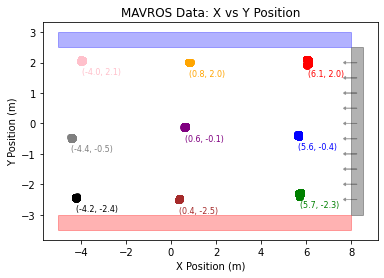

In [114]:
# scatter plot of the xm, ym data 
plt.scatter(df1['x_mavros'], df1['y_mavros'], label='File 1', alpha=0.5,color='red')
plt.scatter(df2['x_mavros'], df2['y_mavros'], label='File 2', alpha=0.5,color='blue')
plt.scatter(df3['x_mavros'], df3['y_mavros'], label='File 3', alpha=0.5,color='green')
plt.scatter(df4['x_mavros'], df4['y_mavros'], label='File 4', alpha=0.5,color='orange')
plt.scatter(df5['x_mavros'], df5['y_mavros'], label='File 5', alpha=0.5,color='purple')
plt.scatter(df6['x_mavros'], df6['y_mavros'], label='File 6', alpha=0.5,color='brown')
plt.scatter(df7['x_mavros'], df7['y_mavros'], label='File 7', alpha=0.5,color='pink')
plt.scatter(df8['x_mavros'], df8['y_mavros'], label='File 8', alpha=0.5,color='gray')
plt.scatter(df9['x_mavros'], df9['y_mavros'], label='File 9', alpha=0.5,color='black')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.title('MAVROS Data: X vs Y Position')
# add rectangle to the plot between x=6 and x = 6.5 spanning from y = -3 to y = 2.5
plt.gca().add_patch(plt.Rectangle((8, -3), 0.5, 5.5, color='black', alpha=0.3))
# add 20 arrows from the center of the rectangle to the left with size 0.5
for i in range(-25, 25,5):
    plt.arrow(8.25, i/10, -0.5, 0, head_width=0.1, head_length=0.1, fc='black', ec='black', alpha=0.3)
# add blue rectangle to the top of the plot between x=-5 and x = 8 spanning from y = 2.5 to y = 3.0
plt.gca().add_patch(plt.Rectangle((-5, 2.5), 13, 0.5, color='blue', alpha=0.3))
# add red rectangle to the bottom of the plot between x=-5 and x = 8 spanning from y = -3.5 to y = -3
plt.gca().add_patch(plt.Rectangle((-5, -3.5), 13, 0.5, color='red', alpha=0.3))
# add text pox of average point location in each cluster
mean_x1 = df1['x_mavros'].mean()
mean_y1 = df1['y_mavros'].mean()
mean_x2 = df2['x_mavros'].mean()
mean_y2 = df2['y_mavros'].mean()
mean_x3 = df3['x_mavros'].mean()
mean_y3 = df3['y_mavros'].mean()
mean_x4 = df4['x_mavros'].mean()
mean_y4 = df4['y_mavros'].mean()
mean_x5 = df5['x_mavros'].mean()
mean_y5 = df5['y_mavros'].mean()
mean_x6 = df6['x_mavros'].mean()
mean_y6 = df6['y_mavros'].mean()
mean_x7 = df7['x_mavros'].mean()
mean_y7 = df7['y_mavros'].mean()
mean_x8 = df8['x_mavros'].mean()
mean_y8 = df8['y_mavros'].mean()
mean_x9 = df9['x_mavros'].mean()
mean_y9 = df9['y_mavros'].mean()
plt.text(mean_x1, mean_y1-0.45, '('+ str(np.round(mean_x1, 1)) + ", " + str(np.round(mean_y1, 1)) + ')', fontsize=8, color='red')
plt.text(mean_x2, mean_y2-0.45, '('+ str(np.round(mean_x2, 1)) + ", " + str(np.round(mean_y2, 1)) + ')', fontsize=8, color='blue')
plt.text(mean_x3, mean_y3-0.45, '('+ str(np.round(mean_x3, 1)) + ", " + str(np.round(mean_y3, 1)) + ')', fontsize=8, color='green')
plt.text(mean_x4, mean_y4-0.45, '('+ str(np.round(mean_x4, 1)) + ", " + str(np.round(mean_y4, 1)) + ')', fontsize=8, color='orange');
plt.text(mean_x5, mean_y5-0.45, '('+ str(np.round(mean_x5, 1)) + ", " + str(np.round(mean_y5, 1)) + ')', fontsize=8, color='purple');
plt.text(mean_x6, mean_y6-0.45, '('+ str(np.round(mean_x6, 1)) + ", " + str(np.round(mean_y6, 1)) + ')', fontsize=8, color='brown');
plt.text(mean_x7, mean_y7-0.45, '('+ str(np.round(mean_x7, 1)) + ", " + str(np.round(mean_y7, 1)) + ')', fontsize=8, color='pink');
plt.text(mean_x8, mean_y8-0.45, '('+ str(np.round(mean_x8, 1)) + ", " + str(np.round(mean_y8, 1)) + ')', fontsize=8, color='gray');
plt.text(mean_x9, mean_y9-0.45, '('+ str(np.round(mean_x9, 1)) + ", " + str(np.round(mean_y9, 1)) + ')', fontsize=8, color='black');
# plt.legend()
plt.show()



In [127]:
import numpy as np

def circular_std(angles, axis=None, ddof=0):
    """
    Compute the circular standard deviation of an array of angles (radians),
    correctly handling NaNs by ignoring them in the computation.

    Parameters
    ----------
    angles : array‐like
        Angles in radians. May contain NaNs.
    axis : int or None
        Axis along which to compute the statistic. If None, use the flattened array.
    ddof : int
        “Delta degrees of freedom” for an unbiased estimate (only relevant for small samples).

    Returns
    -------
    sigma : float or ndarray
        The circular standard deviation in radians, with NaN where insufficient data.
    """
    angles = np.asarray(angles)
    # Compute sine and cosine of each angle
    cos_a = np.cos(angles)
    sin_a = np.sin(angles)
    # Compute mean resultant components, ignoring NaNs
    C = np.nanmean(cos_a, axis=axis)
    S = np.nanmean(sin_a, axis=axis)
    R = np.hypot(C, S)

    # Count non-NaN entries
    if axis is None:
        N = np.sum(~np.isnan(angles))
    else:
        N = np.sum(~np.isnan(angles), axis=axis)

    # Bias correction for sample size if ddof > 0
    if ddof != 0:
        with np.errstate(divide='ignore', invalid='ignore'):
            factor = N / (N - ddof)
        # Where count <= ddof, set factor to NaN
        factor = np.where(N > ddof, factor, np.nan)
        R = R * factor

    # Clamp R to avoid numerical issues
    eps = np.finfo(float).eps
    R = np.clip(R, eps, 1.0)

    # Compute circular standard deviation
    sigma = np.sqrt(-2.0 * np.log(R))

    # Where insufficient data, set sigma to NaN
    if axis is None:
        if N <= ddof:
            sigma = np.nan
    else:
        mask = N <= ddof
        sigma = np.where(mask, np.nan, sigma)

    return sigma

# Example usage with NaNs
angles = np.array([0.1, np.nan, 6.1, 6.2, np.nan])
print("Circular std (rad):", circular_std(angles))
print("Circular std (deg):", np.degrees(circular_std(angles)))


Circular std (rad): 0.11736175786342436
Circular std (deg): 6.724333401810518


/tmp/ipykernel_385300/3061483739.py:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0,0,1,0.96])


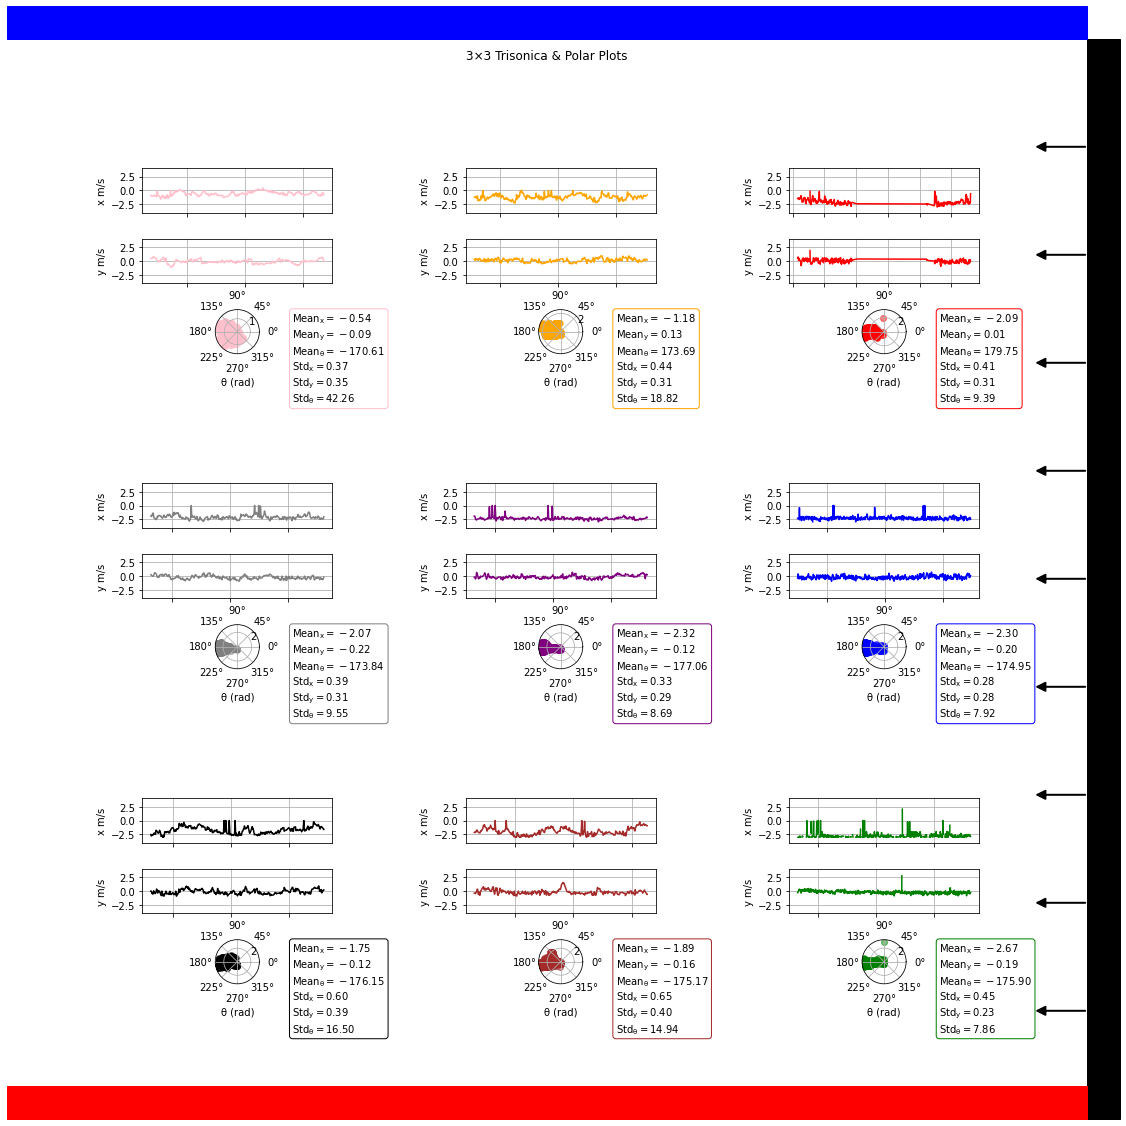

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from matplotlib.patches import Rectangle

# manually map your DataFrames
dfs = {
    1: df1, 2: df2, 3: df3,
    4: df4, 5: df5, 6: df6,
    7: df7, 8: df8, 9: df9
}

colors = {
    1:'red',2:'blue',3:'green',
    4:'orange',5:'purple',6:'brown',
    7:'pink',8:'gray',9:'black'
}

fig = plt.figure(figsize=(15,15))
outer = GridSpec(3,3, wspace=0.7, hspace=0.7)

for row_idx, row in enumerate(file_order):
    for col_idx, file_idx in enumerate(row):
        df = dfs[file_idx]
        col = colors[file_idx]

        inner = GridSpecFromSubplotSpec(3,1,
                    subplot_spec=outer[row_idx, col_idx],
                    hspace=0.6)

        ax0 = fig.add_subplot(inner[0])
        ax0.plot(df.time, df.x_trisonica, color=col)
        ax0.set_ylim(-4,4)
        ax0.set_ylabel('x m/s')
        # ax0.legend([f'File {file_idx} x'], loc='upper right')
        ax0.grid(True)

        ax1 = fig.add_subplot(inner[1], sharex=ax0)
        ax1.plot(df.time, df.y_trisonica, color=col)
        ax1.set_ylim(-4,4)
        ax1.set_ylabel('y m/s')
        # ax1.legend([f'File {file_idx} y'], loc='upper right')
        ax1.grid(True)
        ax1.set_xticklabels([])

        ax2 = fig.add_subplot(inner[2], projection='polar')
        theta = np.arctan2(df.y_trisonica, df.x_trisonica)
        r     = np.hypot(df.x_trisonica, df.y_trisonica)
        ax2.scatter(theta, r, color=col, alpha=0.5)
        # ax2.set_title(f'Polar (File {file_idx})', pad=25)
        ax2.set_xlabel('θ (rad)')
        ax2.grid(True)

        # calculate the mean and standard deviation for x and y and the theta
        mean_x = df.x_trisonica.mean()
        mean_y = df.y_trisonica.mean()
        #use the circular std function to calculate the circular standard deviation
        mean_theta = np.degrees(np.arctan2(mean_y, mean_x))
        std_x = df.x_trisonica.std()
        std_y = df.y_trisonica.std()
        std_theta = np.degrees(circular_std(theta))
        # add text box with the mean and standard deviation
        textstr = '\n'.join((
            r'$\mathrm{Mean_x}=%.2f$' % (mean_x, ),
            r'$\mathrm{Mean_y}=%.2f$' % (mean_y, ),
            r'$\mathrm{Mean_\theta}=%.2f$' % (mean_theta, ),
            r'$\mathrm{Std_x}=%.2f$' % (std_x, ),
            r'$\mathrm{Std_y}=%.2f$' % (std_y, ),
            r'$\mathrm{Std_\theta}=%.2f$' % (std_theta, )))
        # these are matplotlib.patch.Patch properties
        props = dict(boxstyle='round', facecolor='white', alpha=1,edgecolor=col)
        # place a text box in upper left in axes coords
        ax2.text(1.75, 0.95, textstr, transform=ax2.transAxes, fontsize=10,
                verticalalignment='top', bbox=props)
        # add a rectangle to the polar plot


fig.tight_layout(rect=[0,0,1,0.96])
fig.suptitle('3×3 Trisonica & Polar Plots', y=0.99)
from matplotlib.patches import Rectangle, FancyArrowPatch
import numpy as np

# 1) big black bar on the right
rect = Rectangle(
    (1.0, 0.0),    # lower‐left in figure coords
    0.03,          # 3% of figure width
    1.0,           # 100% of figure height
    transform=fig.transFigure,
    color='black',
    clip_on=False
)
fig.patches.append(rect)
# 1) big blue bar on the top
rect = Rectangle(
    (0.0, 1),    # lower‐left in figure coords
    1.0,           # 100% of figure width
    0.03,          # 3% of figure height
    transform=fig.transFigure,
    color='blue',
    clip_on=False
)
fig.patches.append(rect)

#1) big gray bar on the bottom
rect = Rectangle(
    (0.0, 0),    # lower‐left in figure coords
    1.0,           # 100% of figure width
    0.03,          # 3% of figure height
    transform=fig.transFigure,
    color='red',
    clip_on=False
)
fig.patches.append(rect)

# 2) arrows from that bar pointing left
n_arrows = 9
ys = np.linspace(0.9, 0.1, n_arrows)
for y in ys:
    arr = FancyArrowPatch(
        posA=(1.0, y),      # tail at right‐edge
        posB=(0.95, y),     # head 5% inwards
        transform=fig.transFigure,
        arrowstyle='-|>',
        mutation_scale=20,
        color='black',
        linewidth=2,
        clip_on=False
    )
    fig.add_artist(arr)



plt.show()